# Clustering Example #

Clustering is a very common problem in data science. It has a common approach to unlabeled data, and is a good place to start to learn machine learning.  

In [9]:
import numpy as np
import matplotlib.pyplot as plt

This exercise only requires `numpy` and `matplotlib`.

In this case the three elements of the machine learning model are
- Experience/Data/Input: a collection of data points in 2-d space 
- Task: Identify the way that the data points are clustered. Separate the data groups into `nc` clusters.
- Performance/Cost function: Minimize the total distances between the data points and the centroid that they are associated with.

We choose `nc` which is the number of centroids. We then randomly generate data to be in three areas of the x-y space. They are assigned different distribution sizes through `amp`.  The last line (concatenating the data with zeros) is to create a column where we can assign a centroid/color.

In [10]:
nc = 3
amp = [1,2,3]
dat1 = amp[0]*np.random.rand(25,2) + 6
dat1[:,0] -= 3
dat2 = amp[1]*np.random.rand(25,2) + 1
dat3 = amp[2]*np.random.rand(25,2) + 3
dat3[:,0] += 4
dat = np.concatenate((dat1,dat2,dat3),axis=0)
dat = np.concatenate((dat,np.zeros(shape=(dat.shape[0],1))),axis=1)

Next, we choose three initial centroid locations `cent`. They are fixed to have a starting "hypothesis" near the center of the distribution. You can change which line is commented to generate random initial centroid locations.

In [3]:
#cent = 5*np.random.rand(nc,2) + 2
cent = np.array([[4,4],[4,4.5],[3.9,4.4]])

Let's plot the data and current centroids. You'll see the three distinct groupings and can probably tell where the three centroids will end up. Through the K-means iterations, the samples will be assigned to the closest centroid and the color will show that.

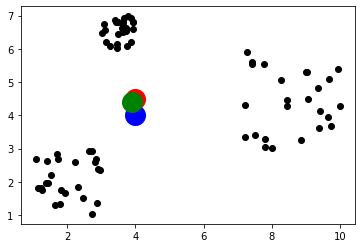

In [4]:
fig,ax=plt.subplots()
plt.scatter(dat[:,0],dat[:,1],color='black')
plt.scatter(cent[0,0],cent[0,1],color='blue',s=400)
plt.scatter(cent[1,0],cent[1,1],color='red',s=400)
plt.scatter(cent[2,0],cent[2,1],color='green',s=400)

A major part of data science is data exploration - get to know your data first!! If you hadn't created this
dataset yourself, you wouldn't know that there appear to be three clusters. 

K-means is a method that looks for a way to organize a pre-defined number of clusters.  That means the model is given the number of clusters 
``nc`` at the start.  

Next is the heart of the model. This is the definition of the K-means function which will iterate until it converges on a classification of all samples. 

In [5]:
def k_means(dat,cent,nc):
    # any sample with the last column of 0, 1, or 2 is associated with the 1st, 2nd, or 3rd centroid, respectively
    c1 = dat[dat[:,2]==0,:2]
    c2 = dat[dat[:,2]==1,:2]
    c3 = dat[dat[:,2]==2,:2]
    # initialize the condition for the while loop and start the iteration counter
    k = 2
    counter = 0
    while k > 0:
        orig = dat[:,2] # this determines the initial "classification" of each sample
        # the next 5 lines compute the distance of each sample to all centroids then finds the closest centroid for each sample
        for i in range(dat.shape[0]):
            dist = np.zeros(nc)
            for j in range(nc):
                dist[j] = np.sqrt(np.sum(np.power(dat[i,:2]-cent[j,:],2)))
            dat[i,2] = np.argmin(dist)
        # next we are assigning each sample a label according to its closest centroid
        c1 = dat[dat[:,2]==0,:2]
        c2 = dat[dat[:,2]==1,:2]
        c3 = dat[dat[:,2]==2,:2]
        # move the centroids closer to the samples assigned to it
        if c1.shape[0] != 0:
            cent[0,0] -= np.sum(cent[0,0]-c1[:,0])/c1.shape[0]
            cent[0,1] -= np.sum(cent[0,1]-c1[:,1])/c1.shape[0]
        if c2.shape[0] != 0:
            cent[1,0] -= np.sum(cent[1,0]-c2[:,0])/c2.shape[0]
            cent[1,1] -= np.sum(cent[1,1]-c2[:,1])/c2.shape[0]
        if c3.shape[0] != 0:
            cent[2,0] -= np.sum(cent[2,0]-c3[:,0])/c3.shape[0]
            cent[2,1] -= np.sum(cent[2,1]-c3[:,1])/c3.shape[0]
        # recompute distances with updated centroid locations
        new = np.zeros(len(orig))
        for i in range(dat.shape[0]):
            dist = np.zeros(nc)
            for j in range(nc):
                dist[j] = np.sqrt(np.sum(np.power(dat[i,:2]-cent[j,:],2)))
            new[i] = np.argmin(dist)
        # find out how many samples changed their assignment
        k = np.sum(np.abs(orig-new))
    return c1,c2,c3,cent

Run the `k_means` function.

In [6]:
c1,c2,c3,cent = k_means(dat,cent,nc)

Plot final results.

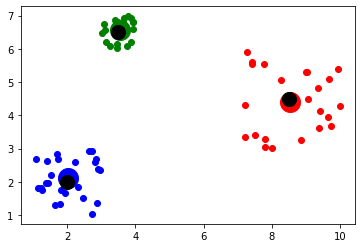

In [7]:
fig,ax=plt.subplots()
plt.scatter(c1[:,0],c1[:,1],color='blue')
plt.scatter(c2[:,0],c2[:,1],color='red')
plt.scatter(c3[:,0],c3[:,1],color='green')
plt.scatter(cent[0,0],cent[0,1],color='blue',s=400)
plt.scatter(cent[1,0],cent[1,1],color='red',s=400)
plt.scatter(cent[2,0],cent[2,1],color='green',s=400)
initial_cent=np.array([[2,2],[8.5,4.5],[3.5,6.5]])
plt.scatter(initial_cent[:,0],initial_cent[:,1],color='black',s=200)

Let us compare the initial with the final results: 

In [8]:
print('initial centroid #1 :',initial_cent[0,:],'model centroid #1:',cent[0,:])
print('initial centroid #2 :',initial_cent[1,:],'model centroid #2:',cent[1,:])
print('initial centroid #3 :',initial_cent[2,:],'model centroid #3:',cent[2,:])

initial centroid #1 : [2. 2.] model centroid #1: [2.02519845 2.10366718]
initial centroid #2 : [8.5 4.5] model centroid #2: [8.54148477 4.40422715]
initial centroid #3 : [3.5 6.5] model centroid #3: [3.56285013 6.57314099]


# Exploration Exercises

1) The model centroids are close to the initial values. Change the number of data points in the generated distribution to see how this effects the model.
2) The distributions in the example are well separated in space. Modify the distribution size `amp` so that they overlap and observe the model's performance.
3) The model was tasked with finding a number of clusters that correspond to the generated distribution. What if the number of clusters given was larger or smaller? Explore the performance by changing `nc` to be different from the number of clusters in the generated distribution. How would you determine the optimal number of clusters? 
4) What is the cost function or performance measure for this model? What is another possible cost function that could be implemented?  How would the model's performance change?  
5) This example involves a two-dimensional distribution. Modify the example to explore a three-dimensional distribution. 

# Applications in Heliophysics #

Where would clustering be useful in Heliophysics? One example involves solar wind data, where there are
many variables and known "clusters" such as fast speed solar wind, solar solar wind, shocked plasma, and ICME (plasma inside a coronal mass ejection.  <a href="https://iopscience.iop.org/article/10.3847/1538-4357/ab5a7a/meta"><i>Roberts et al. (2020)</i></a> did this with solar wind data.  
Because K-means only looks at linear distances between variables, the authors added supplemental variables such as ``cross-helicity`` and ``residual energy``. 

A major disadvantage of K-means is that it only organizes data based on its latent space. If there are separations that are clear in the way that the data are already organized, K-means can be an excellent way to approach this. One can also do some preliminary organization of data, such as deriving the variable Alfven speed. However, what if there are organizational properties that you're not aware of?

Other clustering methods such as TSNE and UMAP allow deeper examination of organizational properties.  <a href="https://link.springer.com/article/10.1007/s11207-020-01609-z"><i>Bloch et al. (2020)</i></a> performed a similar examination of solar wind data to <i>Roberts et al. (2020)</i>, using the UMAP model.  The <a href="https://helioml.org/10/Unsupervised_Classification_of_Solar_Wind_Source_Regions.html">full <i>Bloch et al.</i> dataset and notebooks are available</a> from the <a href="https://helioml.org">helioml.org</a> online textbook. helioml.org has many other examples of heliophysics research projects using machine learning.

# Acknowledgments: # 
E. Gizzi Ph.D.

<a href="helioml.org">HelioML</a> textbook